# 🚴<code style="background:lightgreen;color:black"> BIKE SHARING ASSIGNMENT </code>🚴

## 📈<code style="background:wheat;color:black"> MULTIPLE LINEAR REGRESSION </code>📉

### <code style="background:lightyellow;color:black">The solution is divided into the following sections:</code>
<mark><font color = 'black'>__1) Reading, understanding and visualising the data__</font></mark> </br>
<mark><font color = 'black'>__2) Data preparation (encoding, dummy variables, train-test split, rescaling)__</font></mark> </br>
<mark><font color = 'black'>__3) Building the Model__</font></mark> </br>
<mark><font color = 'black'>__4) Residual Analysis__</font></mark> </br>
<mark><font color = 'black'>__5) Making predictions and evaluation on test set__</font></mark> </br>

## 📌📝<code style="background:lightyellow;color:black">Section 1: Reading, understanding and visualising the data</code>📊

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Read the data from csv file to dataframe 'df' & display the header rows
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Shape of dataframe
df.shape

(730, 16)

In [5]:
# Statistical summary of numerical columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check the brief summary of the dataframe (shows the datatypes of columns and the non-null values data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


__`There are total 730 rows in the dataframe and based on the above brief summary we can say that there are no null values in any of the columns.`__

In [7]:
# Verifying the same using isnull() function
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

# Confirming the change
print(df.columns.to_list())

['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'cnt']


In [9]:
# Dropping the duplicates if any
df.drop_duplicates(inplace=True)

# Checking shape after drop_duplicates operation
df.shape

(730, 16)

__`As the shape is same after dropping duplicates, that means there are no duplicates in the dataframe.`__

In [10]:
# Dropping the redundant columns
# 'instant' has only index for the row, 'dteday' has date which can be compensated by year and month column,
# 'casual' and 'registered' seems to be the breakup by category for 'cnt' column.

df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

# Checking the shape after the drop operation (it should be 730,12)
df.shape

(730, 12)

In [11]:
# Value counts of the 'season' before mapping
print("Before Mapping:")
print(df.season.value_counts())
print('-'*30)

# Encoding/mapping the 'season' column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Value counts of the 'season' after mapping
print("After Mapping:")
print(df.season.value_counts())

Before Mapping:
3    188
2    184
1    180
4    178
Name: season, dtype: int64
------------------------------
After Mapping:
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [12]:
# Unique value list of 'month' before mapping
print("Before Mapping:")
print(df.month.unique().tolist())
print('-'*90)

# Encoding/mapping the 'month' column
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',
                         6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Unique value list of 'month' after mapping
print("After Mapping:")
print(df.month.unique().tolist())

Before Mapping:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
------------------------------------------------------------------------------------------
After Mapping:
['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec']


In [13]:
# Unique value list of 'weekday' before mapping
print("Before Mapping:")
print(df.weekday.unique().tolist())
print('-'*50)

# Encoding/mapping the 'weekday' column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Unique value list of 'weekday' after mapping
print("After Mapping:")
print(df.weekday.unique().tolist())

Before Mapping:
[6, 0, 1, 2, 3, 4, 5]
--------------------------------------------------
After Mapping:
['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']


In [14]:
# Unique value list of 'weathersit' before mapping
print("Before Mapping:")
print(df.weathersit.unique().tolist())
print('-'*40)

# Encoding/mapping the 'weathersit' column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

# Unique value list of 'weathersit' after mapping
print("After Mapping:")
print(df.weathersit.unique().tolist())

Before Mapping:
[2, 1, 3]
----------------------------------------
After Mapping:
['Misty', 'Clear', 'Light_snowrain']


In [15]:
# Check the header of dataset to observe the changes that occured due to the above 4 Map operations
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# Check the column info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


### <code style="background:lightcyan;color:black">Visualising the Data</code>

#### <code style="background:lavender;color:black">Visualising Categorical columns</code>

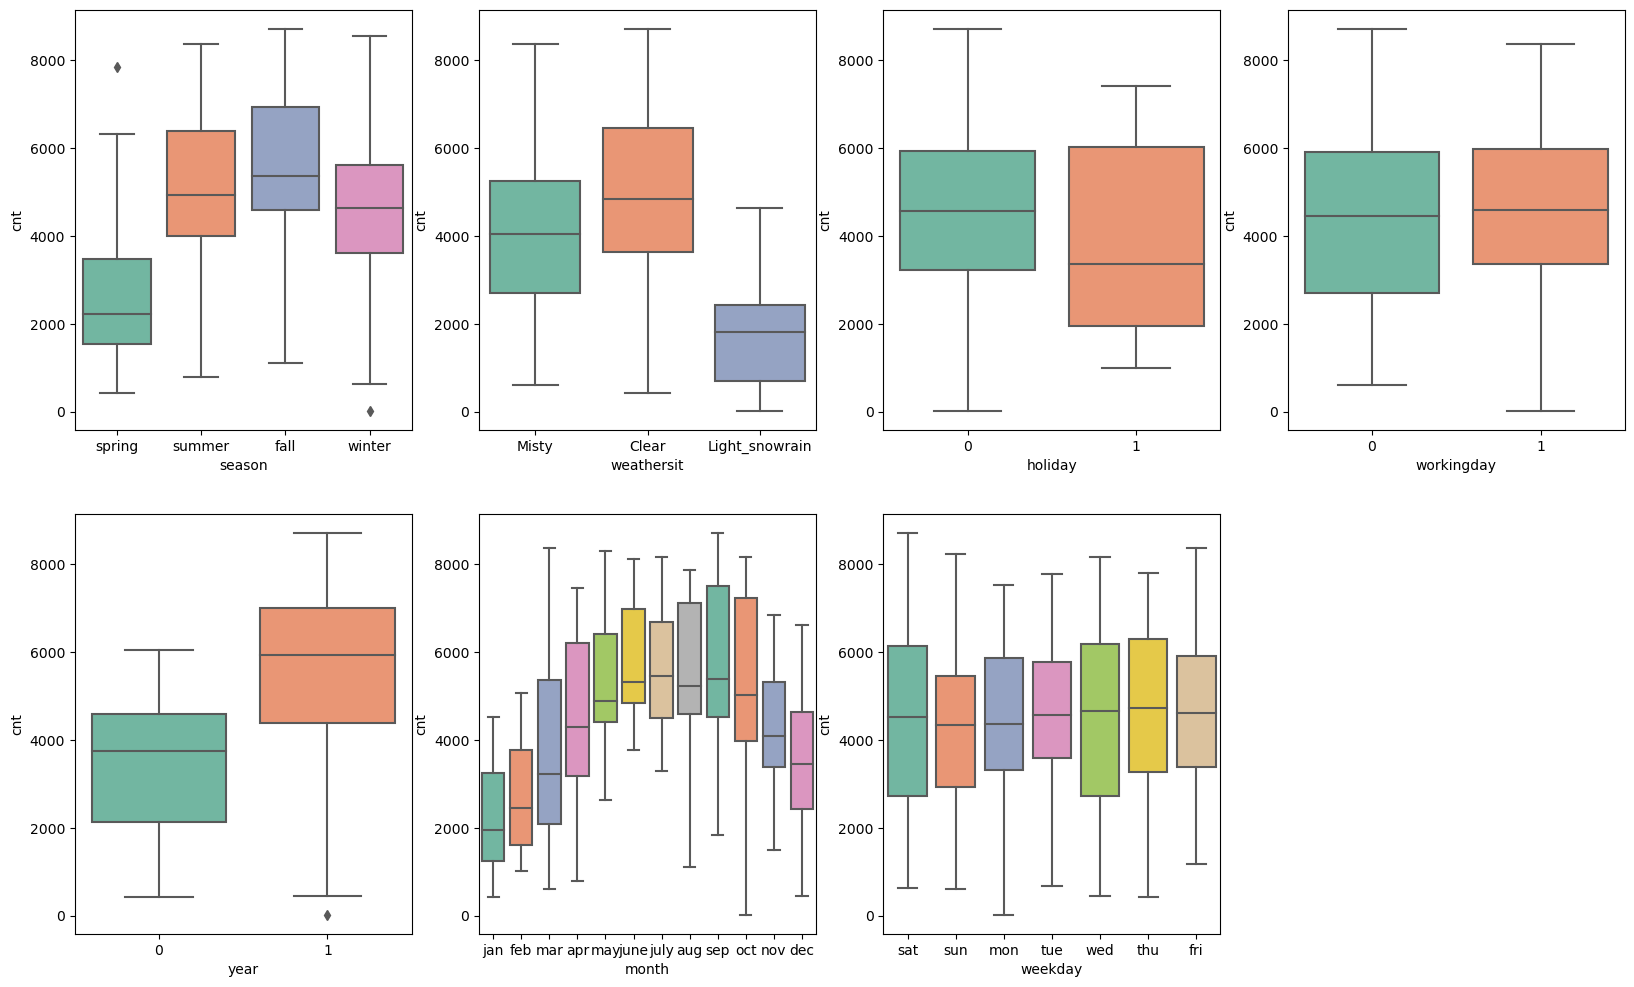

In [17]:
# Analysing/visualizing the categorical columns to see how predictor variables stand against the target variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df, palette = "Set2")

plt.subplot(2,4,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df, palette = "Set2")

plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df, palette = "Set2")

plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df, palette = "Set2")

plt.subplot(2,4,5)
sns.boxplot(x = 'year', y = 'cnt', data = df, palette = "Set2")

plt.subplot(2,4,6)
sns.boxplot(x = 'month', y = 'cnt', data = df, palette = "Set2")

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = df, palette = "Set2")

plt.show()

In [18]:
# Function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df, palette = "Set2")
    
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df, hue='year',hue_order=[0,1],palette='Set2')
    L=plt.legend()
    L.get_texts()[0].set_text('2018')
    L.get_texts()[1].set_text('2019')
    plt.show()

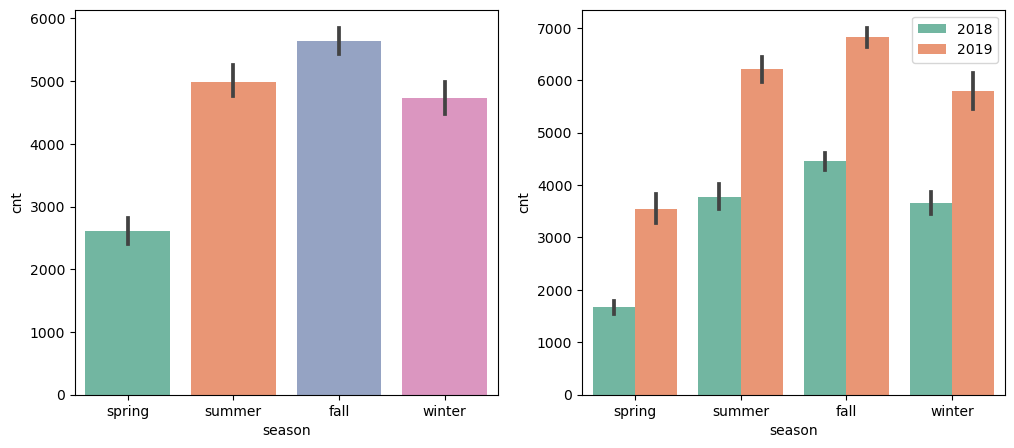

In [19]:
# Plotting visualization for 'season' field
plot_cat_columns('season')

__`Fall season seems to have attracted more booking. Booking count has significantly increased for each season in 2019 compared to 2018.`__

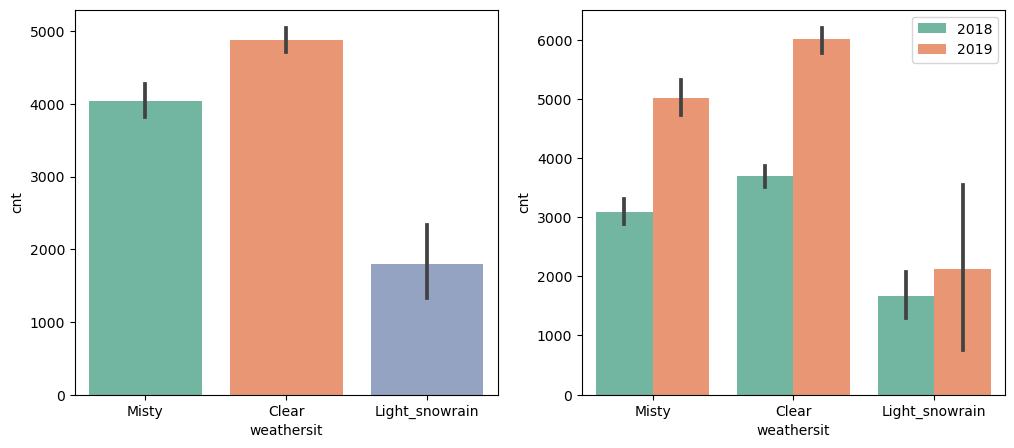

In [20]:
# Plotting visualization for 'weathersit' field
plot_cat_columns('weathersit')

__`Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.`__

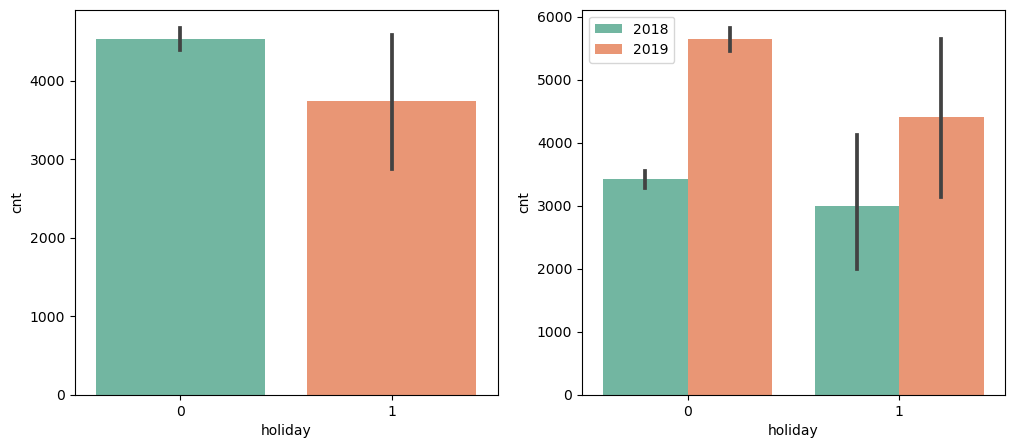

In [21]:
# Plotting visualization for 'holiday' column
plot_cat_columns('holiday')

__`When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.`__

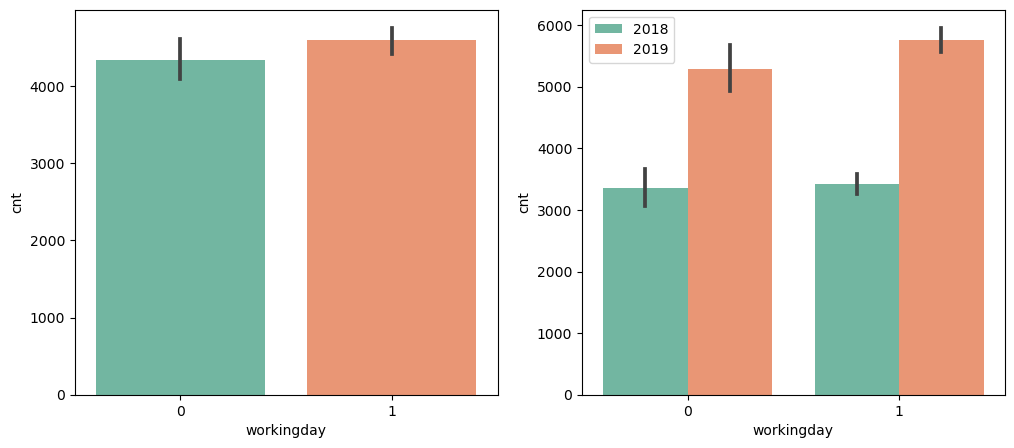

In [22]:
# Plotting visualization for 'workingday' column
plot_cat_columns('workingday')

__`Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.`__

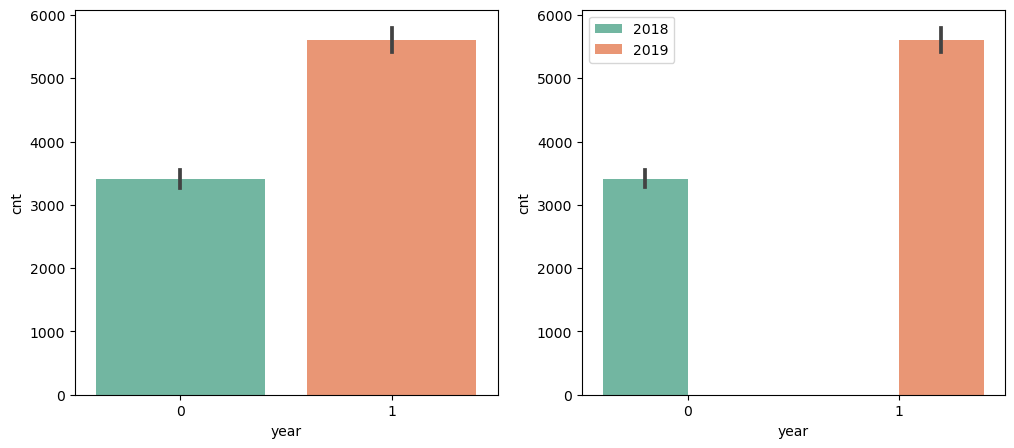

In [23]:
# Plotting visualization for 'year' column
plot_cat_columns('year')

__`2019 attracted more number of booking from the previous year which was evident from the previous plots.`__

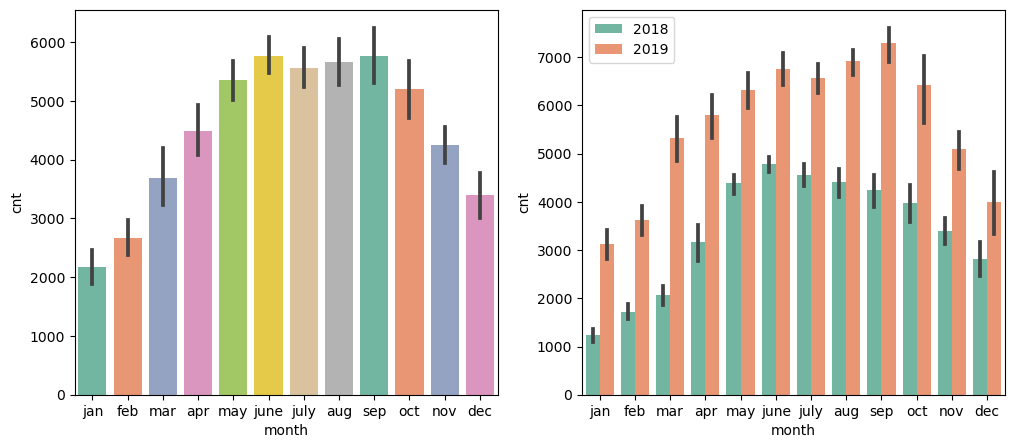

In [24]:
# Plotting visualization for 'month' column
plot_cat_columns('month')

__`Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.`__

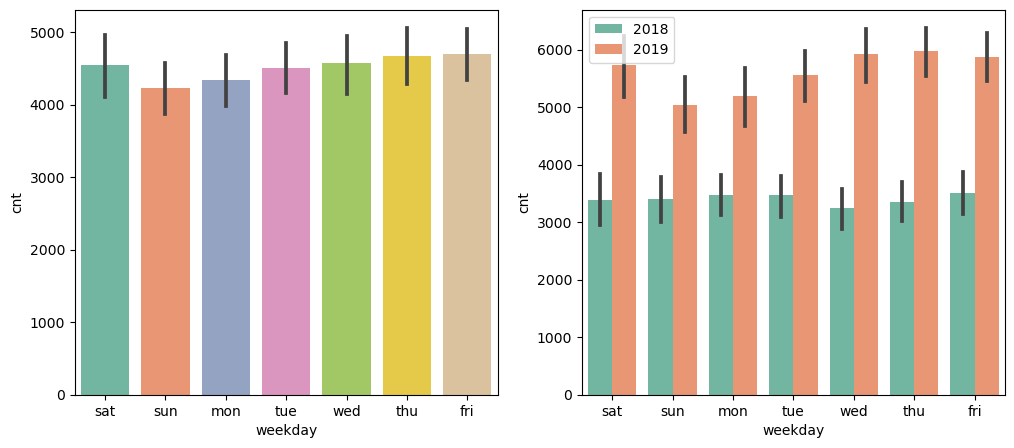

In [25]:
# Plotting visualization for 'weekday' column
plot_cat_columns('weekday')

__`Wed, Thu, Fri and Sat have more number of bookings as compared to the other days (sun, mon & tue) of the week, for the year 2019.`__

#### <code style="background:lavender;color:black">Visualising Numerical columns</code>

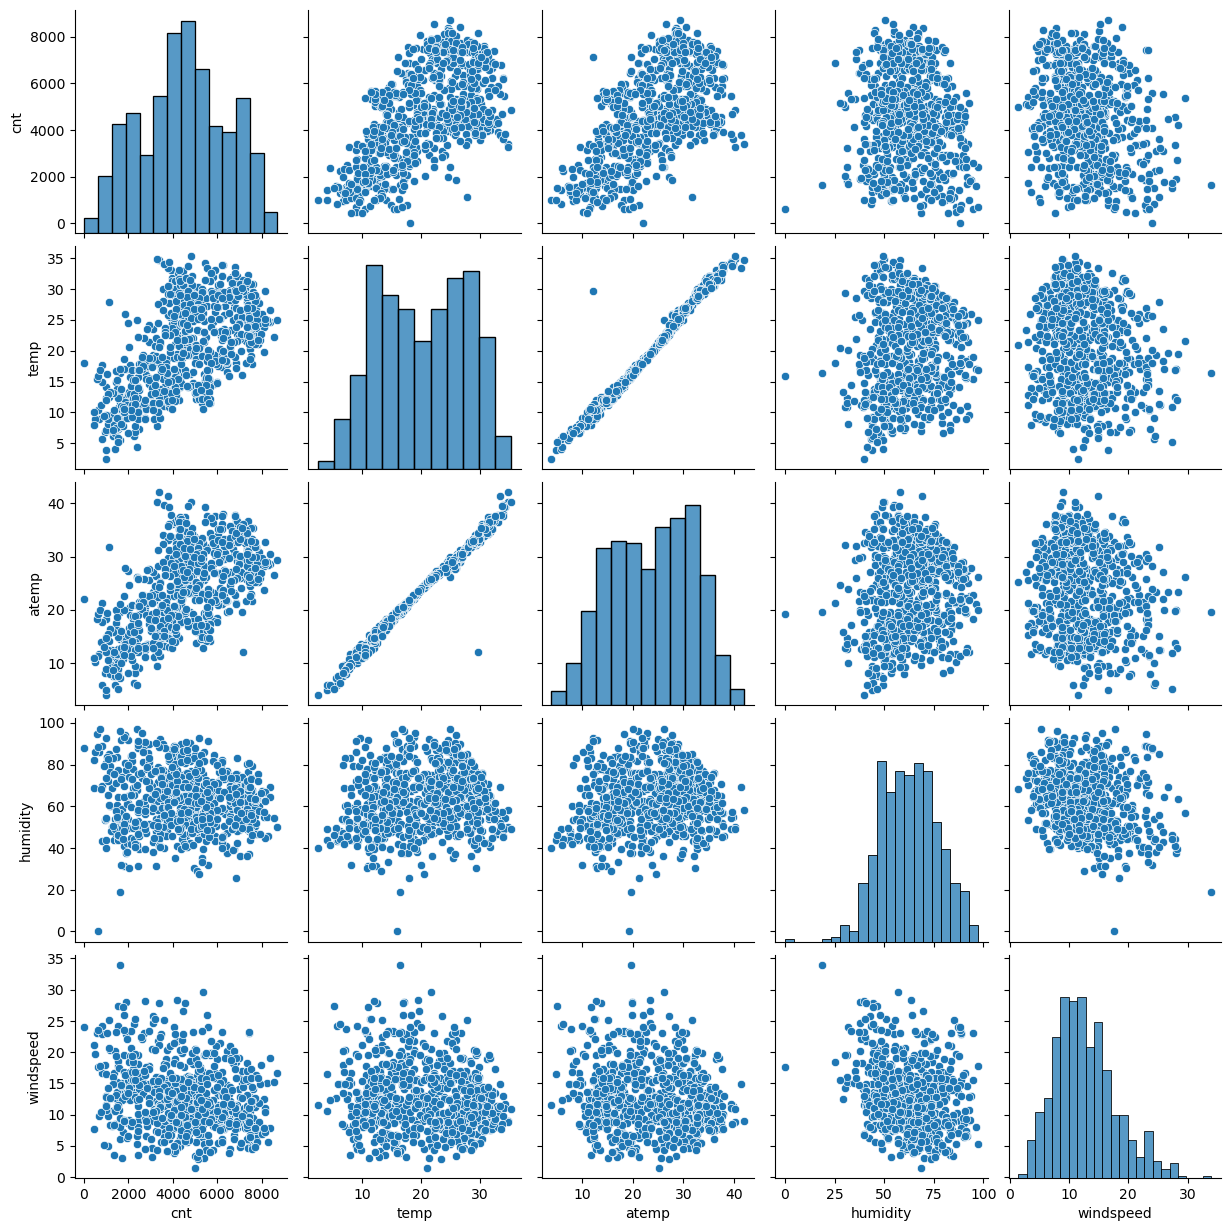

In [26]:
# Analysing and visualizing the numerical columns

sns.pairplot(data=df,vars=['cnt','temp','atemp','humidity','windspeed'])
plt.show()

__`Observations from pair plot:`__

- __`'temp' and 'atemp' are highly correlated, which would contribute to the multicollinearity issue`__
- __`'temp' and 'atemp' are positively correlated with the target variable 'cnt', which is a good sign. Because of such correlations we can consider Linear Regression Model.`__

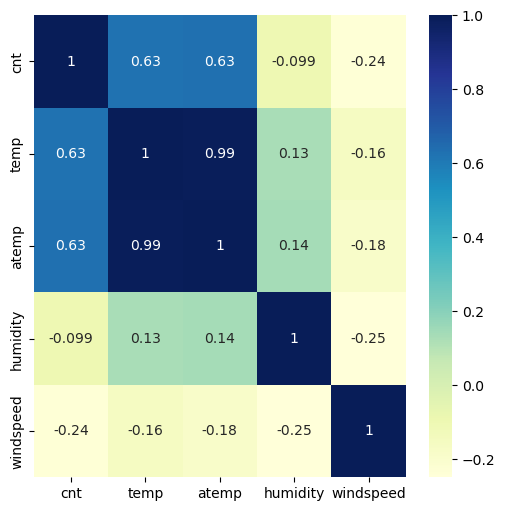

In [27]:
# Checking the pairwise correlation between the numerical variables using a heatmap

plt.figure(figsize = (6,6))
sns.heatmap(df[['cnt','temp','atemp','humidity','windspeed']].corr(), annot=True, cmap='YlGnBu')
plt.show()

__`Observations:`__
- __`'temp' and 'atemp' are both 63% correlated with the target variable 'cnt'`__
- __`'temp' and 'atemp' are 99% correlated with each other. Both of the parameters cannot be used in the model due to multicolinearity issue. We will decide later which parameters to keep based on VIF and p-value w.r.t other variables.`__

## 📌📝<code style="background:lightyellow;color:black">Section 2: Data preparation</code>📋

### <code style="background:lightcyan;color:black">Dummy Variable creation</code>

In [28]:
# Dummy variable creation for month, weekday, weathersit & season variables(along with dropping of redundant column)
# Then displaying top 3 records of the dummy dataframes

months_df = pd.get_dummies(df.month,drop_first=True, dtype=int)
print("Dummy Months Dataframe:\n")
print(months_df.head(3))
print('-'*60)

weekdays_df = pd.get_dummies(df.weekday,drop_first=True, dtype=int)
print("Dummy Weekdays Dataframe:\n")
print(weekdays_df.head(3))
print('-'*60)

weathersit_df = pd.get_dummies(df.weathersit,drop_first=True, dtype=int)
print("Dummy Weather Situations Dataframe:\n")
print(weathersit_df.head(3))
print('-'*60)

seasons_df = pd.get_dummies(df.season,drop_first=True, dtype=int)
print("Dummy Seasons Dataframe:\n")
print(seasons_df.head(3))

Dummy Months Dataframe:

   aug  dec  feb  jan  july  june  mar  may  nov  oct  sep
0    0    0    0    1     0     0    0    0    0    0    0
1    0    0    0    1     0     0    0    0    0    0    0
2    0    0    0    1     0     0    0    0    0    0    0
------------------------------------------------------------
Dummy Weekdays Dataframe:

   mon  sat  sun  thu  tue  wed
0    0    1    0    0    0    0
1    0    0    1    0    0    0
2    1    0    0    0    0    0
------------------------------------------------------------
Dummy Weather Situations Dataframe:

   Light_snowrain  Misty
0               0      1
1               0      1
2               0      0
------------------------------------------------------------
Dummy Seasons Dataframe:

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0


In [29]:
# Displaying the shape of 4 dummy dataframes
print("Shape of Dummy Months Dataframe:", months_df.shape)
print("Shape of Dummy Weekdays Dataframe:", weekdays_df.shape)
print("Shape of Dummy Weather Situations Dataframe:", weathersit_df.shape)
print("Shape of Dummy Seasons Dataframe:", seasons_df.shape)

Shape of Dummy Months Dataframe: (730, 11)
Shape of Dummy Weekdays Dataframe: (730, 6)
Shape of Dummy Weather Situations Dataframe: (730, 2)
Shape of Dummy Seasons Dataframe: (730, 3)


In [30]:
# Concating the dummy dataframes with the original one. 
df_new = pd.concat([df, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)

# Confirming the change (we will have 34 columns after concatenation of all the dataframes)
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [31]:
# Dropping redundant columns as we have already created dummy variables out of them.
df_new = df_new.drop(['season','month','weekday','weathersit'], axis = 1)

# Checking the head of the new dataframe (df_new) 
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [32]:
# Checking the shape of new dataframe (df_new)
df_new.shape

(730, 30)

In [33]:
# Checking the summary of the columns of new dataframe (df_new)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int32  
 9   dec             730 non-null    int32  
 10  feb             730 non-null    int32  
 11  jan             730 non-null    int32  
 12  july            730 non-null    int32  
 13  june            730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

### <code style="background:lightcyan;color:black">Train-test split</code>

In [34]:
# Creating the training set and test set
df_train, df_test = train_test_split(df_new, train_size=0.70, random_state=100)
print("The shape of df_train is:", df_train.shape)
print("The shape of df_test is:", df_test.shape)

The shape of df_train is: (510, 30)
The shape of df_test is: (220, 30)


### <code style="background:lightcyan;color:black">Rescaling</code>

__`Now that we have done the train-test split, we need to scale the variables for better interpretability. But we only need to scale the numeric columns and not the dummy variables. Plus, for scaling, we will use MinMaxScaler from sklearn library.`__

In [35]:
scaler = MinMaxScaler()

num_vars = ['humidity','windspeed','cnt','temp','atemp']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
# Verifying the head after applying scaling
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
# For confirming the normalisation of 'humidity','windspeed','cnt','temp','atemp' variables
# Minimum of all these variables will be 0 and Maximum will be 1
df_train[num_vars].describe()

,humidity,windspeed,cnt,temp,atemp
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.650480,0.320883,0.513499,0.537440,0.513156
std,0.145846,0.169803,0.224421,0.225858,0.212410
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.538643,0.199179,0.356420,0.339853,0.332086
50%,0.653714,0.296763,0.518638,0.542596,0.529718
75%,0.754830,0.414447,0.684710,0.735215,0.688457
max,1.000000,1.000000,1.000000,1.000000,1.000000


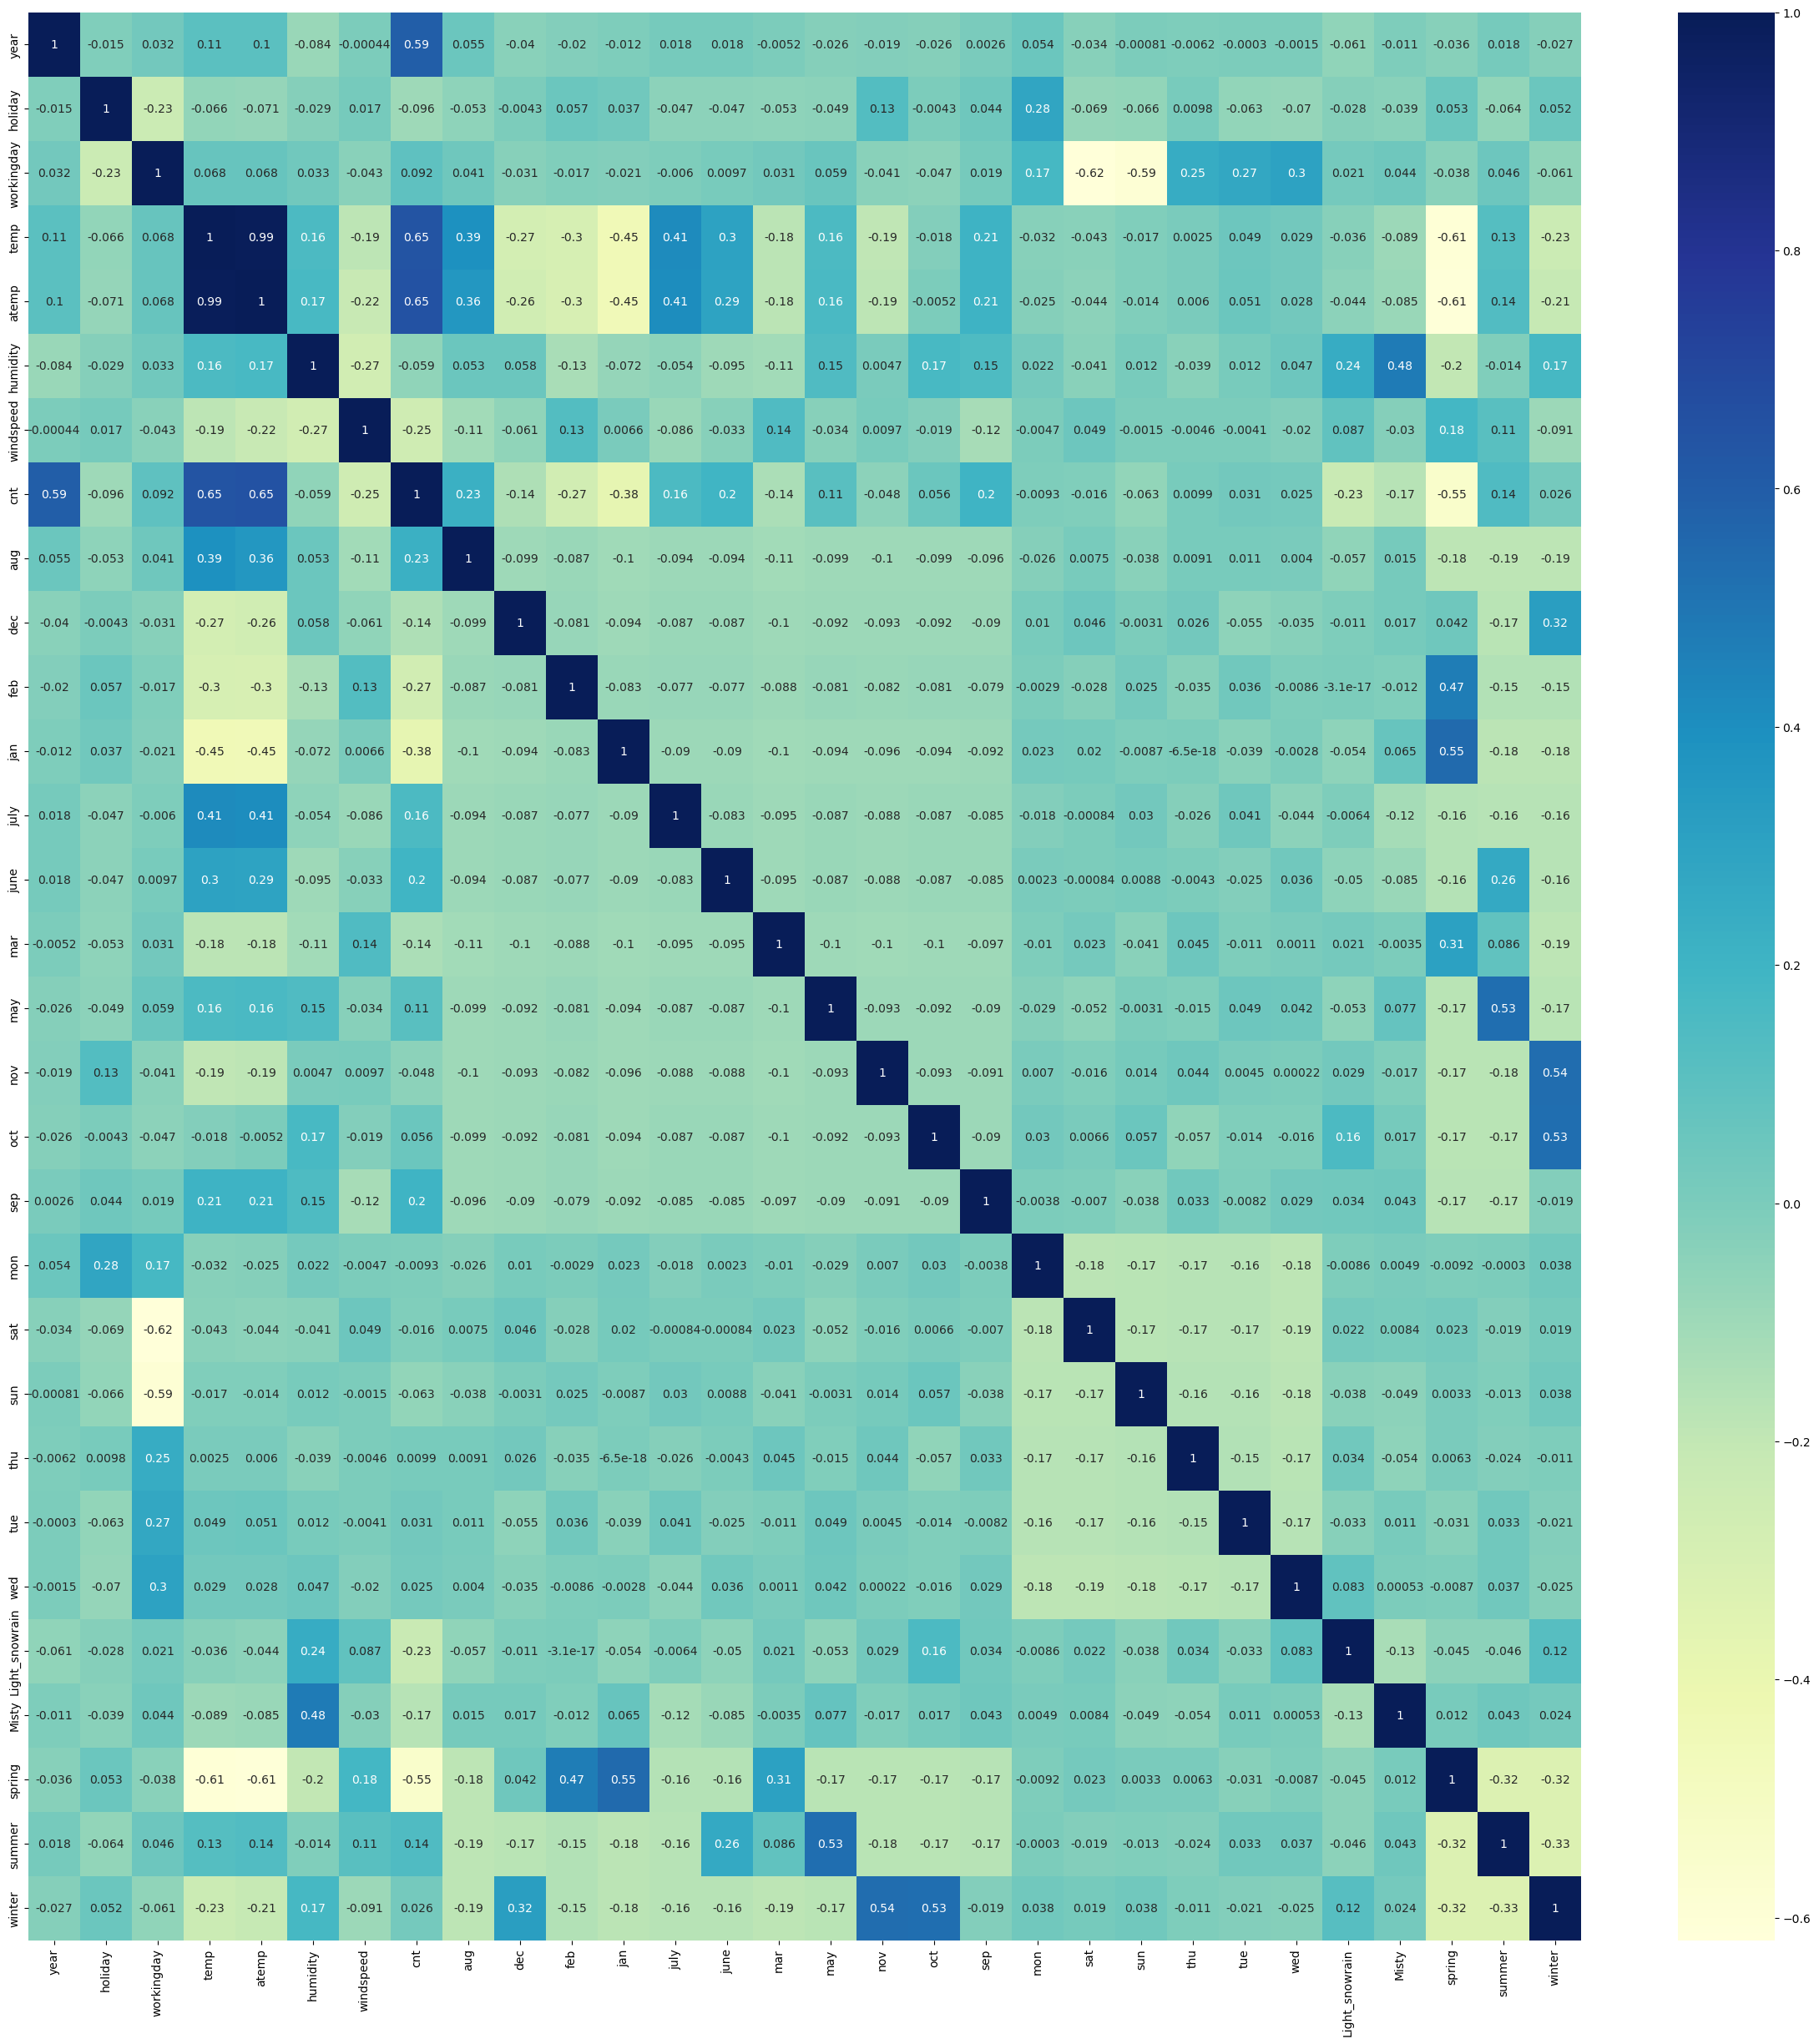

In [38]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### Observations:
- __`'cnt' seems to have correlation with 'year', 'temp' & 'atemp'.`__ 
- __` Similarly, 'Misty' and 'humidity' show correlation.`__ 
- __`'spring' season with 'jan' & 'feb' month.`__ 
- __`'summer' season with 'may' month.`__
- __`'winter' season with 'oct' & 'nov' month show good correlation.`__

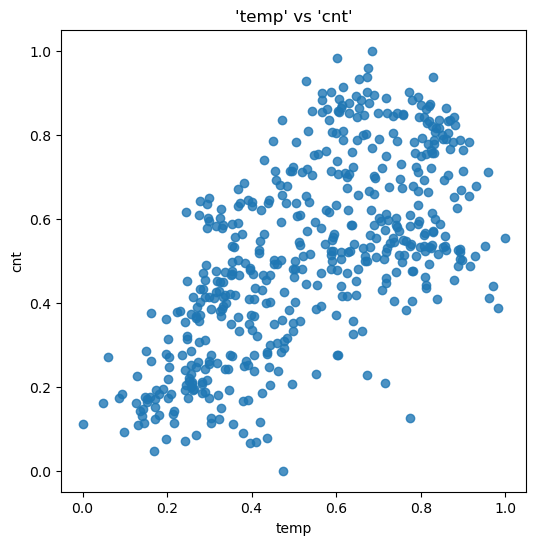

In [39]:
# Visualizing one of the correlation ('temp' vs 'cnt') to see the trends via Scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(df_train['temp'], df_train['cnt'], alpha = 0.8)
plt.xlabel("temp")
plt.ylabel("cnt")
plt.title("'temp' vs 'cnt'")
plt.show()

__`The visualisation confirms some positive linear relation between 'temp' and 'cnt'.`__

<div class="alert alert-block alert-success">
    <b>While visualising the data and inspecting the correlarion matrix, we observed that there are some variables which are linearly related and correlated with the target variable 'cnt'. So, we can go ahead with building the Linear Regression Model.</b>
</div>

## 📌📝<code style="background:lightyellow;color:black">Section 3: Building the Model</code>📈

__`For selecting features we will be using a balanced approach (automated + manual). First, we will be doing a coarse tuning using Recursive Feature Elimination(RFE) and arrive at a rough set of top 15 features. Then, we will build the model using all the 15 features and after observing the p-values & the VIF information, we will keep on removing one variable at a time till we reach the final model.`__

In [40]:
# Creating X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [41]:
# Recursive Feature Elimination
lm = LinearRegression()
lm.fit(X_train, y_train)

# Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lm, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

In [42]:
# List of features with their selection status and ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [43]:
# To see the columns (features) that RFE selected and creating a column list for that
col_rfe_selected = X_train.columns[rfe.support_]
print(col_rfe_selected)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [44]:
# Checking which columns have been rejected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [45]:
# Generic function to calculate VIF of variables

def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [46]:
# Shape of X_train
X_train.shape

(510, 29)

In [47]:
# Subsetting training data for 15 RFE selected columns
X_train_rfe = X_train[col_rfe_selected]

# Shape of dataframe with RFE seleted variables
X_train_rfe.shape

(510, 15)

### <code style="background:lightcyan;color:black">1st Model (With all the 15 Features)</code>

In [48]:
# Building 1st linear regression model

# Add a constant/intercept
X_train_sm = sm.add_constant(X_train_rfe)

# Create the model
lr_model = sm.OLS(y_train,X_train_sm).fit()

# Model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          4.22e-191
Time:                        19:20:58   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [49]:
# Calculate the VIF of features

get_vif(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


#### While dropping variables, we will have 4 scenarios based on p-values & VIF information:

1. __`High p-value, high VIF - Remove them (as the variable is less significant and highly collinear with others)`__
2. __`High p-value, low VIF - Remove these before removing 3rd scenario variables`__
3. __`Low p-value, High VIF - Remove these after removing 2nd scenario variables`__
4. __`Low p-value, low VIF - Keep them as it is (high significance + less collinear)`__

<div class="alert alert-block alert-success">
    <b>Model Analytics (1st Model):</br>
    1) R-squared of 1st model is pretty good (84.8%) which means 84.8% of the variance in target variable 'cnt' is being explained by these 15 predictor variables.</br>
    2) The p-values of all the coefficients are below 5%. So, in this model, all the coefficients are statistically significant.</br>
    3) But since the VIF of 'humidity' is very high, which implies it is highly collinear with other variables, so dropping it in the next line of code.</br>
    4) This feature elimination will be in allignment with the 3rd scenario (low p, high VIF).</b>
</div>

In [50]:
X_train_rfe = X_train_rfe.drop('humidity',axis=1)

### <code style="background:lightcyan;color:black">2nd Model (With all the Features except 'humidity')</code>

In [51]:
# Building 2nd linear regression model

# Add a constant/intercept
X_train_sm = sm.add_constant(X_train_rfe)

# Create the model
lr_model = sm.OLS(y_train,X_train_sm).fit()

# Model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          1.60e-188
Time:                        19:21:12   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [52]:
# Calculate the VIF of features

get_vif(X_train_rfe)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


<div class="alert alert-block alert-success">
    <b>Model Analytics (2nd Model):</br> 
    1) After dropping 'humidity', R-squared value of 2nd model has not changed much compared to 1st model (~84%).</br>
    2) The p-values of all the coefficients are below 5%. In this model also, all the coefficients are statistically significant.</br>
    3) But since the VIF of 'temp' is still decently high (more than 5), implies it has high collinearity with other variables, so dropping it next.</br>
    4) This feature elimination will be in allignment with the 3rd scenario (low p, high VIF).</b>
</div>

In [53]:
X_train_rfe = X_train_rfe.drop('temp',axis=1)

### <code style="background:lightcyan;color:black">3rd Model (With all the Features except 'humidity' & 'temp')</code>

In [54]:
# Building 3rd linear regression model

# Add a constant/intercept
X_train_sm = sm.add_constant(X_train_rfe)

# Create the model
lr_model = sm.OLS(y_train,X_train_sm).fit()

# Model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          6.44e-154
Time:                        19:21:21   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5444      0.020     27.

In [55]:
# Calculate the VIF of features

get_vif(X_train_rfe)

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
10,spring,2.97
11,summer,2.29
12,winter,1.98
0,year,1.91
7,sat,1.69
4,jan,1.60
9,Misty,1.57
5,july,1.30


<div class="alert alert-block alert-success">
    <b>Model Analytics (3rd Model):</br> 
    1) After dropping 'temp', it is found that in the 3rd model R-squared has dropped to 78% which is still a decent model.</br>
    2) But the p-value of 'july' increased to 65.6%, which is very high (implies the coefficient is statistically insignificant).</br>
    3) And the p-value of 'holiday' is bit high (8%). We will deal with this after dropping 'july'.</br>
    4) And the VIF values of all the variables are below 5 (which is a good sign) - this sorts our multicollinearity issue.</br>
    5) Hence, dropping 'july' field next.</br>
    6) This feature elimination will be in allignment with the 2nd scenario (high p, low VIF).</b>
</div>

In [56]:
X_train_rfe = X_train_rfe.drop('july',axis=1)

### <code style="background:lightcyan;color:black">4th Model (With all the Features except 'humidity' , 'temp' & 'july')</code>

In [57]:
# Building 4th linear regression model

# Add a constant/intercept
X_train_sm = sm.add_constant(X_train_rfe)

# Create the model
lr_model = sm.OLS(y_train,X_train_sm).fit()

# Model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          5.73e-155
Time:                        19:21:32   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5406      0.018     29.

In [58]:
# Calculate the VIF of features

get_vif(X_train_rfe)

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
9,spring,2.68
10,summer,2.01
0,year,1.89
11,winter,1.78
6,sat,1.62
4,jan,1.60
8,Misty,1.57
5,sep,1.20


<div class="alert alert-block alert-success">
    <b>Model Analytics (4th Model):</br> 
    1) After dropping 'july', it is found that in the 4th model R-squared is almost the same (78%).</br>
    2) But the p-value of 'holiday' is still 8%, which is bit high (so, it has a less statistically significant coefficient).</br>
    3) And the VIF values of all the variables are below 5.</br>
    4) Hence, dropping 'holiday' field next.</br>
    5) This feature elimination will be in allignment with the 2nd scenario (high p, low VIF).</b>
</div>

In [59]:
X_train_rfe = X_train_rfe.drop('holiday',axis=1)

### <code style="background:lightcyan;color:black">5th Model (With all the Features except 'humidity' , 'temp', 'july' & 'holiday')</code>

In [60]:
# Building 5th linear regression model

# Add a constant/intercept
X_train_sm = sm.add_constant(X_train_rfe)

# Create the model
lr_model = sm.OLS(y_train,X_train_sm).fit()

# Model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          2.01e-155
Time:                        19:21:45   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5332      0.018     30.

In [61]:
# Calculate the VIF of features

get_vif(X_train_rfe)

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
8,spring,2.65
9,summer,2.00
0,year,1.88
10,winter,1.73
3,jan,1.60
7,Misty,1.57
5,sat,1.56
4,sep,1.18


<div class="alert alert-block alert-success">
    <b>Model Analytics (5th Model):</br> 
    1) After dropping 'holiday', the R-squared value in the 5th model is almost the same i.e. ~78% which means ~78% of the variance in target variable 'cnt' is being explained by all the remaining 11 features (predictor variables).</br>
    2) p-values of all the coefficients are below 5%, which shows all the coefficients are statistically significant.</br>
    3) The VIF values of all the variables are below 5, which shows we don't have much multicollinearity issue now in this model.</br>
    4) The Probability(F-statistic) is pretty low which shows that the model fit is not by chance.</br>
    5) We can say that this is the final model that we have converged upon.</b>
</div>

In [62]:
# Checking the Final model's parameters along with their coefficient values 

lr_model.params

const             0.533171
year              0.248004
workingday        0.056374
windspeed        -0.188695
jan              -0.103255
sep               0.071471
sat               0.064819
Light_snowrain   -0.302344
Misty            -0.087382
spring           -0.258093
summer           -0.039401
winter           -0.074260
dtype: float64

## 📌📝<code style="background:lightyellow;color:black">Section 4: Residual Analysis</code>📊

__`Before we make predictions on the test set, let's first analyse the residuals and validate the assumptions of Linear Regression after building the model on the training set.`__

In [63]:
# Predictions on Training set
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

576    0.787605
426    0.452336
728    0.397957
482    0.683646
111    0.390873
dtype: float64

In [64]:
# Error = y_train - y_train_pred
res =  y_train - y_train_pred
res.head()

576    0.040053
426    0.012919
728   -0.193861
482   -0.200674
111   -0.199778
dtype: float64

### <code style="background:lightcyan;color:black">Normality of Error terms</code>

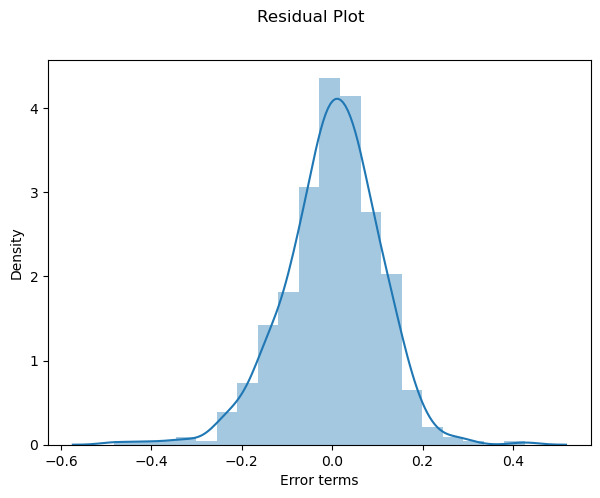

In [65]:
# Residual plot
plt.figure(figsize=(7,5))
sns.distplot(res, bins=20)
plt.suptitle('Residual Plot')
plt.xlabel('Error terms') # Error terms = y_train - y_train_pred
plt.show()

__`The error terms are fairly normally distributed with mean centered around zero. The fundamental assumption of Linear Regression is respected.`__

### <code style="background:lightcyan;color:black">Homoscedasticity</code>

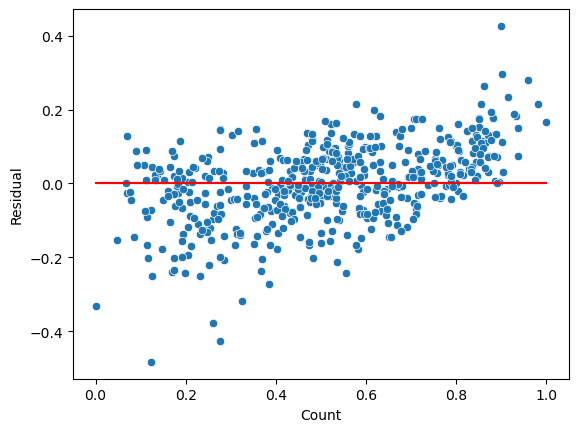

In [66]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train - y_train_pred

sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

__`No visible pattern observed from the above plot for residuals.`__

### <code style="background:lightcyan;color:black">Linearity</code>

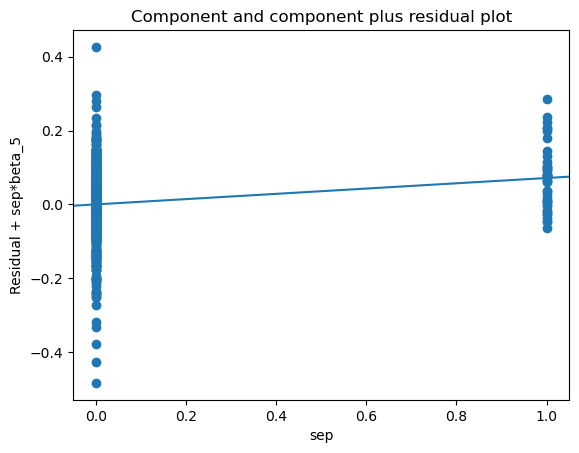

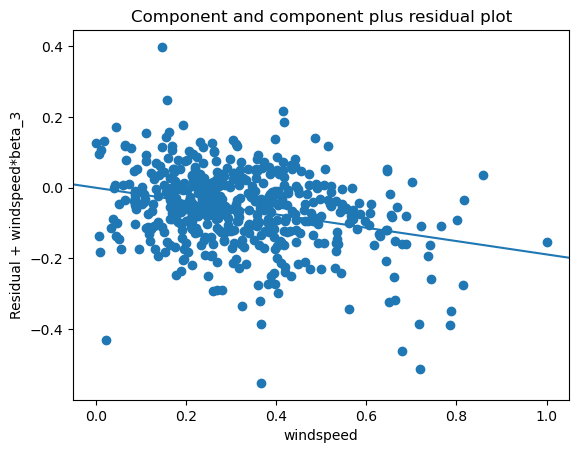

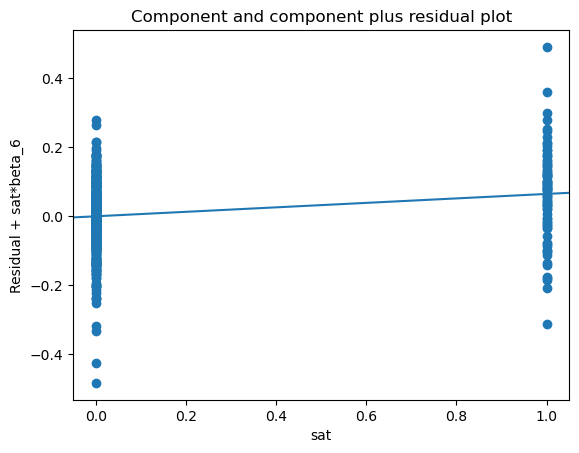

In [67]:
# Linear relationship validation using CCPR plot

sm.graphics.plot_ccpr(lr_model, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_model, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_model, 'sat')
plt.show()

__`Linearity can be observed from the above plots.`__

## 📌📝<code style="background:lightyellow;color:black">Section 5: Making predictions and evaluation on test set</code>📈

In [68]:
# Display header of test set
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,1,0,0,0,0,0,1,0


In [69]:
# Rescaling the numerical columns of test set using the same scaler that was fit on the training set
num_vars = ['humidity','windspeed','cnt','temp','atemp']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [70]:
# Confirming the changes due to scaling
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [71]:
# Creating X_test, y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
# Selecting the same features on test set, as per the features available on the final model (5th Model)
X_test = X_test[X_train_rfe.columns]

In [73]:
# Adding a constant/intercept
X_test_sm = sm.add_constant(X_test)

# Making predictions
y_test_pred = lr_model.predict(X_test_sm)

In [74]:
y_test_pred.head()

184    0.429897
535    0.769141
299    0.364840
221    0.525471
152    0.448738
dtype: float64

### <code style="background:lightcyan;color:black">Model Evaluation</code>

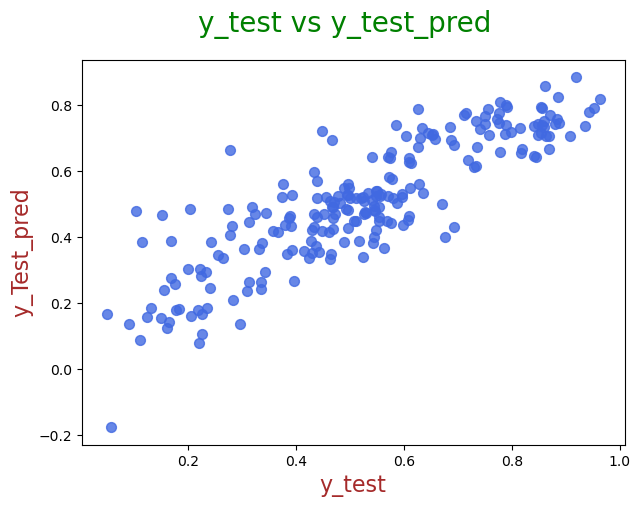

In [75]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.8, s=50, c='royalblue')
fig.suptitle('y_test vs y_test_pred', fontsize = 20, color='green') 
plt.xlabel('y_test', fontsize = 16, color='brown')
plt.ylabel('y_Test_pred', fontsize = 16, color='brown') 
plt.show()

In [76]:
# R-Squared value on the test set

r2_test = r2_score(y_true= y_test, y_pred=y_test_pred)
round(r2_test,3)

0.742

In [77]:
round(lr_model.params,4)

const             0.5332
year              0.2480
workingday        0.0564
windspeed        -0.1887
jan              -0.1033
sep               0.0715
sat               0.0648
Light_snowrain   -0.3023
Misty            -0.0874
spring           -0.2581
summer           -0.0394
winter           -0.0743
dtype: float64

__`The equation of best fitted line is:`__

$ cnt = 0.5332 + 0.2480  \times  year + 0.0564  \times  workingday - 0.1887 \times windspeed - 0.1033 \times jan + 0.0715 \times sep + 0.0648 \times sat - 0.3023 \times Lightsnowrain - 0.0874 \times Misty - 0.2581 \times spring - 0.0394 \times summer - 0.0743 \times winter $

In [78]:
# Calculating Adjusted R-squared value for the test dataset
N = X_test.shape[0] # No of records
p = X_test.shape[1] # No of independent variables

Adjusted_r2_test = round(1-((1-r2_test)*(N-1)/(N-p-1)),3)
print(Adjusted_r2_test)

0.728


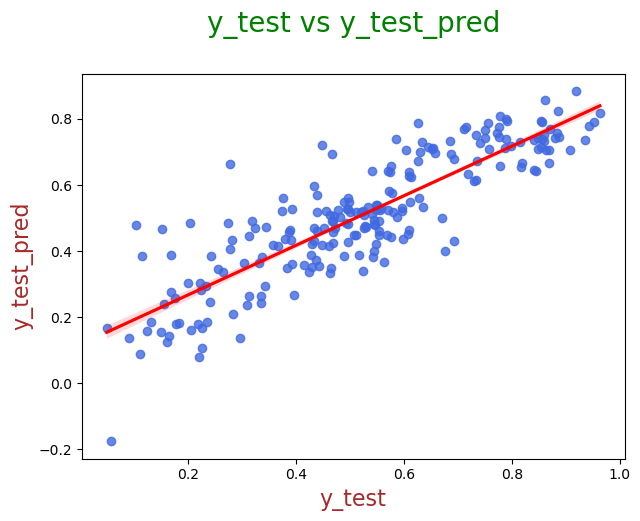

In [79]:
# Visualizing the fit on the test data
# Plotting a Regression plot

plt.figure(figsize=(7,5))
sns.regplot(x= y_test, y= y_test_pred, ci=70, fit_reg=True,scatter_kws={"color": "royalblue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred\n', fontsize=20, color='green')
plt.xlabel('y_test', fontsize=16, color='brown')
plt.ylabel('y_test_pred', fontsize=16, color='brown')
plt.show()

### Comparision between Metrics of Training and Test dataset:
> __`Train dataset R^2          : 0.779`__</br>
> __`Test dataset R^2           : 0.742`__</br></br>
> __`Train dataset Adjusted R^2 : 0.774`__   
> __`Test dataset Adjusted R^2  : 0.728`__

#### `Demand of bikes depend on 'year', 'workingday', 'windspeed', 'jan', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer' and 'winter'.`

<div class="alert alert-block alert-success">
    <b>The R-squared & Adjusted R-squared of training set and test set are comparable (within 5% range) which shows that the final model is stable and it also shows that whatever the model has learned on the training set, it is able to generalise well on the test set.</b>
</div>

### <code style="background:lightcyan;color:black"> Conclusion </code>

<div class="alert alert-block alert-info">
    <b>Significant variables to predict the demand for shared bikes:</br>
    1. 'year'</br>
    2. 'workingday'</br>
    3. 'windspeed'</br>
    4. Seasons ('spring', 'summer', 'winter')</br>
    5. Months - January, September ('jan', 'sep')</br>
    6. Saturday ('sat')</br>
    7. Weather situation ('Misty','Light_snowrain') </b>
</div>

<div class="alert alert-block alert-info">
    <b>And How well these variables describe the bike demands is given by the below rule: </br>

$ cnt = 0.5332 + 0.2480  \times  year + 0.0564  \times  workingday - 0.1887 \times windspeed - 0.1033 \times jan + 0.0715 \times sep + 0.0648 \times sat - 0.3023 \times Lightsnowrain - 0.0874 \times Misty - 0.2581 \times spring - 0.0394 \times summer - 0.0743 \times winter $</b>
</div>